In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from subprocess import check_output

In [2]:
df = pd.read_csv("E:\Spring 2023\CSE445\Dhaka_PM2.5_2022.csv", parse_dates=["Date (LT)"])

In [3]:
df

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Dhaka,PM2.5 - Principal,2022-01-01 01:00:00,2022,1,1,1,130.1,190,Unhealthy,129,UG/M3,1 Hr,Valid
1,Dhaka,PM2.5 - Principal,2022-01-01 02:00:00,2022,1,1,2,128.1,188,Unhealthy,126,UG/M3,1 Hr,Valid
2,Dhaka,PM2.5 - Principal,2022-01-01 03:00:00,2022,1,1,3,125.1,187,Unhealthy,121,UG/M3,1 Hr,Valid
3,Dhaka,PM2.5 - Principal,2022-01-01 04:00:00,2022,1,1,4,125.6,187,Unhealthy,126,UG/M3,1 Hr,Valid
4,Dhaka,PM2.5 - Principal,2022-01-01 05:00:00,2022,1,1,5,124.2,186,Unhealthy,120,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8407,Dhaka,PM2.5 - Principal,2022-12-31 20:00:00,2022,12,31,20,239.8,289,V. Unhealthy,265,UG/M3,1 Hr,Valid
8408,Dhaka,PM2.5 - Principal,2022-12-31 21:00:00,2022,12,31,21,296.7,347,Hazardous,346,UG/M3,1 Hr,Valid
8409,Dhaka,PM2.5 - Principal,2022-12-31 22:00:00,2022,12,31,22,268.9,319,Hazardous,241,UG/M3,1 Hr,Valid
8410,Dhaka,PM2.5 - Principal,2022-12-31 23:00:00,2022,12,31,23,261.4,312,Hazardous,254,UG/M3,1 Hr,Valid


In [4]:
df.reset_index(inplace=True)
df.set_index('Date (LT)', inplace = True)
#drop index column
df= df.drop(columns= ['index'], axis=1)

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.25, random_state = 10)
train

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
Date (LT),,,,,,,,,,,,,
2022-08-14 09:00:00,Dhaka,PM2.5 - Principal,2022,8,14,9,14.9,57,Moderate,15,UG/M3,1 Hr,Valid
2022-12-30 23:00:00,Dhaka,PM2.5 - Principal,2022,12,30,23,244.0,294,V. Unhealthy,258,UG/M3,1 Hr,Valid
2022-04-26 08:00:00,Dhaka,PM2.5 - Principal,2022,4,26,8,82.3,165,Unhealthy,78,UG/M3,1 Hr,Valid
2022-04-04 18:00:00,Dhaka,PM2.5 - Principal,2022,4,4,18,57.3,152,Unhealthy,62,UG/M3,1 Hr,Valid
2022-06-16 12:00:00,Dhaka,PM2.5 - Principal,2022,6,16,12,58.3,152,Unhealthy,64,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-04 16:00:00,Dhaka,PM2.5 - Principal,2022,8,4,16,37.7,106,Un. Sensitive,49,UG/M3,1 Hr,Valid
2022-11-15 06:00:00,Dhaka,PM2.5 - Principal,2022,11,15,6,141.5,195,Unhealthy,141,UG/M3,1 Hr,Valid
2022-02-26 06:00:00,Dhaka,PM2.5 - Principal,2022,2,26,6,96.8,172,Unhealthy,82,UG/M3,1 Hr,Valid


In [6]:
#checking null values
train.isnull().any()
train.isnull().sum()

Site             0
Parameter        0
Year             0
Month            0
Day              0
Hour             0
NowCast Conc.    0
AQI              0
AQI Category     9
Raw Conc.        0
Conc. Unit       0
Duration         0
QC Name          0
dtype: int64

In [7]:
#Handling Null Values
train.fillna(method="ffill", inplace = True)
train.isnull().any()
train.isnull().sum()

Site             0
Parameter        0
Year             0
Month            0
Day              0
Hour             0
NowCast Conc.    0
AQI              0
AQI Category     0
Raw Conc.        0
Conc. Unit       0
Duration         0
QC Name          0
dtype: int64

In [8]:
#handling special values
# Replace '-999' and 'Missing' with 'Nan'

train.replace([-999, 'Missing'], np.nan, inplace=True)

# Forward-fill NaN values

train.fillna(method='ffill', inplace=True)

#Replacing 'Hr' in Duration column by empty string
train['Duration'] = train['Duration'].replace('[A-Za-z]','',regex=True)

<AxesSubplot:xlabel='AQI Category', ylabel='count'>

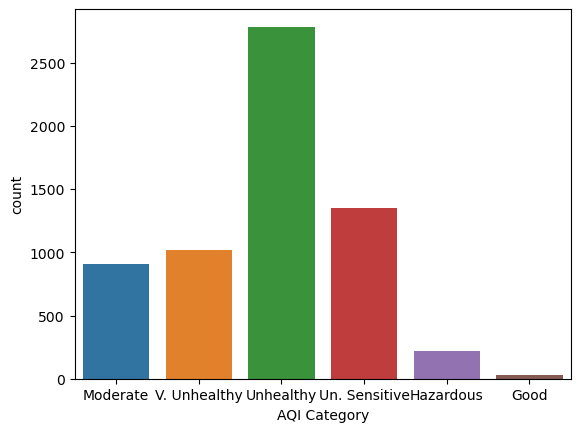

In [9]:
#checking balance and plotting histogram
train['AQI Category'].value_counts()
sns.countplot(x=train['AQI Category'])

In [10]:
#unique value checking for categorical Features

print("Unique value in Site: ",train['Site'].unique())
print("Unique value in Parameter: ",train['Parameter'].unique())
print("Unique value in AQI Category: ",train['AQI Category'].unique())
print("Unique value in Conc. Unit: ",train['Conc. Unit'].unique())
print("Unique value in QC Name: ",train['QC Name'].unique())

Unique value in Site:  ['Dhaka']
Unique value in Parameter:  ['PM2.5 - Principal']
Unique value in AQI Category:  ['Moderate' 'V. Unhealthy' 'Unhealthy' 'Un. Sensitive' 'Hazardous' 'Good']
Unique value in Conc. Unit:  ['UG/M3']
Unique value in QC Name:  ['Valid' 'Invalid' 'Suspect']


In [11]:
#Converting categorical to numerical (label encoding)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['N_Site']=le.fit_transform(train.Site)
train['N_Parameter']=le.fit_transform(train.Parameter)
train['N_Conc. Unit']=le.fit_transform(train['Conc. Unit'])
train['N_QC Name']=le.fit_transform(train['QC Name'])
train['N_AQI Category']=le.fit_transform(train['AQI Category'])

In [12]:
train= train.drop(columns= ['Site','Parameter','AQI Category','Conc. Unit','QC Name'], axis=1)

In [13]:
X=train.drop(columns=['N_AQI Category'])
Y=train['N_AQI Category']

4    2784
3    1354
5    1016
2     907
1     221
0      27
Name: N_AQI Category, dtype: int64
2    2784
5    2784
4    2784
3    2784
1    2784
0    2784
Name: N_AQI Category, dtype: int64


<AxesSubplot:xlabel='N_AQI Category', ylabel='count'>

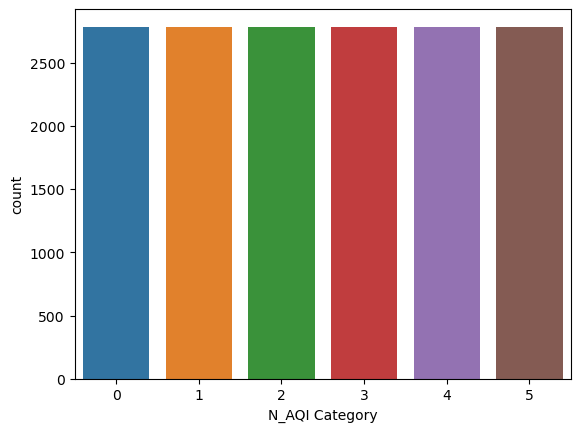

In [14]:
print(Y.value_counts())

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'not majority')
X_sm, Y_sm = smote.fit_resample(X,Y)

print(Y_sm.value_counts())
sns.countplot(x=Y_sm)

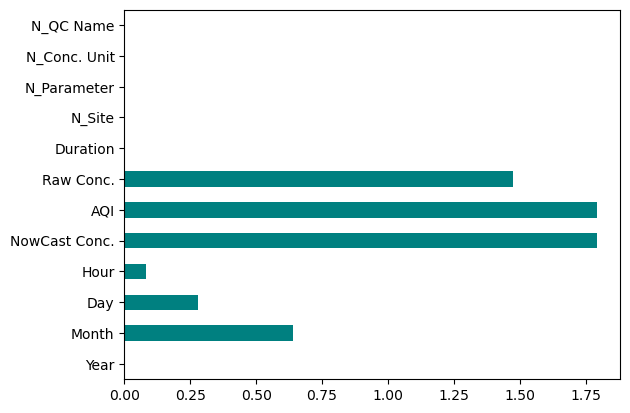

In [15]:
from sklearn.feature_selection import mutual_info_classif
entropy= mutual_info_classif(X_sm,Y_sm)
fit_entrophy= pd.Series(entropy,train.columns[0:len(train.columns)-1])
fit_entrophy.plot(kind='barh', color='teal')
plt.show()

<AxesSubplot:>

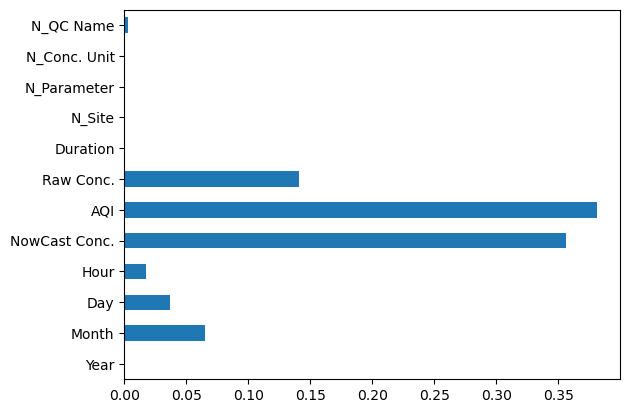

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
importance_model= ExtraTreesClassifier(criterion='gini')
importance_model.fit(X_sm,Y_sm)

fit_importance= pd.Series(importance_model.feature_importances_, index= X_sm.columns)
fit_importance.plot(kind='barh')

In [17]:
top8=X_sm[["AQI","NowCast Conc.","Raw Conc.","Month","Day","Hour","Year","N_QC Name"]]
top6=X_sm[["AQI","NowCast Conc.","Raw Conc.","Month","Day","Hour"]]
top4=X_sm[["AQI","NowCast Conc.","Raw Conc.","Month"]]

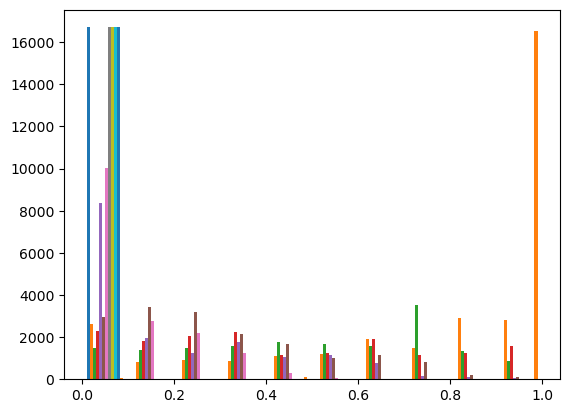

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler1= MinMaxScaler()
minmax_scaled_X= scaler1.fit_transform(X_sm)
minmax_scaled_top8= scaler1.fit_transform(top8)
minmax_scaled_top6= scaler1.fit_transform(top6)
minmax_scaled_top4= scaler1.fit_transform(top4)

plt.hist(minmax_scaled_X)
plt.show()

Decision Tree

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn import tree 

In [20]:
k = 9
kf = KFold(n_splits=k, random_state=None)

In [21]:
acc_tree_val=[]
acc_tree_train=[]
precision_tree=[]
recall_tree=[]
f1_tree=[]
AOC_tree=[]
ROC_tree_metrix=[]
fpr_tree_metrix=[]
tpr_tree_metrix=[]

In [22]:
Tree_model= DecisionTreeClassifier(criterion='gini', max_depth= 5)
for train_index , val_index in kf.split(minmax_scaled_X):
    
    X_train, X_val= minmax_scaled_X[train_index], minmax_scaled_X[val_index]
    y_train , y_val = Y_sm[train_index] , Y_sm[val_index]
    
    

    Tree_model.fit(X_train,y_train)
    tree_pred_values_train = Tree_model.predict(X_train)
    tree_pred_values_val = Tree_model.predict(X_val)
    
    test_accuracy_of_tree_train = accuracy_score(y_train,tree_pred_values_train)
    test_accuracy_of_tree_val = accuracy_score(y_val,tree_pred_values_val)
    
    acc_tree_train.append(test_accuracy_of_tree_train)
    acc_tree_val.append(test_accuracy_of_tree_val)
    
    precision_tree.append (precision_score(y_val,tree_pred_values_val,average='micro'))
    recall_tree.append(recall_score(y_val,tree_pred_values_val,average='micro'))
    f1_tree.append(f1_score(y_val,tree_pred_values_val,average='micro'))
    
    clf = LogisticRegression(solver="liblinear").fit(X_train,y_train)
    auc_score_of_tree=roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')
    AOC_tree.append(auc_score_of_tree)

In [24]:
print("Evaluation of Decision Tree:-------------------------------------------------")

avg_acc_score_of_tree_train = sum(acc_tree_train)/k
print("Train accuracy of Decision Tree: ",avg_acc_score_of_tree_train)
#print("\n")

avg_acc_score_of_tree_val = sum(acc_tree_val)/k
print("Validation accuracy of Decision Tree: ",avg_acc_score_of_tree_val)
#print("\n")

#print(pd.crosstab(y_test,tree_pred_values))

avg_precision= sum(precision_tree)/k
print("\nPrecision Score: ",avg_precision)

avg_recall_micro= sum(recall_tree)/k
print("recall Score:", avg_recall_micro)

avg_f1=sum(f1_tree)/k
print("f1 Score: ", avg_f1)

Evaluation of Decision Tree:-------------------------------------------------
Train accuracy of Decision Tree:  1.0
Validation accuracy of Decision Tree:  1.0

Precision Score:  1.0
recall Score: 1.0
f1 Score:  1.0


In [25]:
param_dist = {
    "criterion":["gini", "entropy"],
    "max_depth":[1,2,3,4,5,6,7,8,None]
}

In [26]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(Tree_model, param_grid = param_dist, cv = 7)

In [27]:
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 8}

Test Dataset

In [28]:
#checking null values
test.isnull().any()
test.isnull().sum()

Site             0
Parameter        0
Year             0
Month            0
Day              0
Hour             0
NowCast Conc.    0
AQI              0
AQI Category     5
Raw Conc.        0
Conc. Unit       0
Duration         0
QC Name          0
dtype: int64

In [29]:
test.fillna(method="ffill", inplace = True)
test.isnull().any()
test.isnull().sum()

Site             0
Parameter        0
Year             0
Month            0
Day              0
Hour             0
NowCast Conc.    0
AQI              0
AQI Category     0
Raw Conc.        0
Conc. Unit       0
Duration         0
QC Name          0
dtype: int64

In [30]:
#handling special values
# Replace missing values with NaN and 'Missing' with 'Valid'

test.replace([-999, 'Missing'], np.nan, inplace=True)

# Forward-fill NaN values

test.fillna(method='ffill', inplace=True)

#Replacing 'Hr' in Duration column by empty string
test['Duration'] = test['Duration'].replace('[A-Za-z]','',regex=True)

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test['N_Site']=le.fit_transform(test.Site)
test['N_Parameter']=le.fit_transform(test.Parameter)
test['N_Conc. Unit']=le.fit_transform(test['Conc. Unit'])
test['N_QC Name']=le.fit_transform(test['QC Name'])
test['N_AQI Category']=le.fit_transform(test['AQI Category'])

In [32]:
test= test.drop(columns= ['Site','Parameter','AQI Category','Conc. Unit','QC Name'], axis=1)

In [33]:
X_test_unscalled = test.drop(columns=['N_AQI Category'])
y_test=test['N_AQI Category']


In [34]:
scaler2= MinMaxScaler()
X_test= scaler2.fit_transform(X_test_unscalled)

In [35]:
tree_pred_values_test = Tree_model.predict(X_test)
    
test_accuracy_of_tree = accuracy_score(y_test,tree_pred_values_test)
        
test_precision_tree = precision_score(y_test,tree_pred_values_test,average='micro')
test_recall_tree = recall_score(y_test,tree_pred_values_test,average='micro')
test_f1_tree = f1_score(y_test,tree_pred_values_test,average='micro')
    
clf = LogisticRegression(solver="liblinear").fit(X_test,y_test)
auc_score_of_tree=roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

result = pd.DataFrame(columns=['Model', 'Accuracy Score'])
result.loc[0] = ['Decision Tree', test_accuracy_of_tree]

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n Confusion Matrix:\n', confusion_matrix(y_test, tree_pred_values_test))
print('\n Classification Report:\n', classification_report(y_test, tree_pred_values_test))


 Confusion Matrix:
 [[  4   0   0   0   0   0]
 [  0  71   0   0   0   0]
 [  2   0 297   0   0   0]
 [  0   0  36 415   0   0]
 [  0   0   0   0 833  59]
 [  0  34   0   0   0 352]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.68      1.00      0.81        71
           2       0.89      0.99      0.94       299
           3       1.00      0.92      0.96       451
           4       1.00      0.93      0.97       892
           5       0.86      0.91      0.88       386

    accuracy                           0.94      2103
   macro avg       0.85      0.96      0.89      2103
weighted avg       0.95      0.94      0.94      2103



Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [38]:
k= 9
kf = KFold(n_splits= k, random_state=None)


train_acc_forest=[]
val_acc_forest=[]
precision_forest=[]
recall_forest=[]
f1_forest=[]
AOC_forest=[]
ROC_forest_metrix=[]
fpr_forest_metrix=[]
tpr_forest_metrix=[]

In [39]:
forestModel = RandomForestClassifier(max_depth =  8, max_features =  0.6, max_samples =  1.0, n_estimators = 60)
for train_index , val_index in kf.split(minmax_scaled_X):
    
    X_train, X_val= minmax_scaled_X[train_index], minmax_scaled_X[val_index]
    y_train , y_val = Y_sm[train_index] , Y_sm[val_index]
    
    forestModel.fit(X_train,y_train)
    forest_pred_values_train = forestModel.predict(X_train)
    forest_pred_values_val = forestModel.predict(X_val)

    accuracy_of_forest_train = accuracy_score(y_train,forest_pred_values_train)
    accuracy_of_forest_val = accuracy_score(y_val,forest_pred_values_val)
    
    train_acc_forest.append(accuracy_of_forest_train)
    val_acc_forest.append(accuracy_of_forest_val)

    precision_forest.append (precision_score(y_val, forest_pred_values_val, average = 'micro'))
    recall_forest.append(recall_score(y_val,forest_pred_values_val, average = 'micro'))
    f1_forest.append(f1_score(y_val,forest_pred_values_val, average = 'micro'))

In [40]:
print("Evaluation of Random Forest:-------------------------------------------------")

avg_acc_score_of_forest_train = sum(train_acc_forest)/k
print("Train accuracy of Random Forest: ",avg_acc_score_of_forest_train)
#print("\n")

avg_acc_score_of_forest_val = sum(val_acc_forest)/k
print("Validation accuracy of Random Forest: ",avg_acc_score_of_forest_val)
#print("\n")

#print(pd.crosstab(y_test,tree_pred_values))

avg_precision= sum(precision_forest)/k
print("\nPrecision Score: ",avg_precision)

avg_recall_micro= sum(recall_forest)/k
print("recall Score:", avg_recall_micro)

avg_f1=sum(f1_forest)/k
print("f1 Score: ", avg_f1)

Evaluation of Random Forest:-------------------------------------------------
Train accuracy of Random Forest:  1.0
Validation accuracy of Random Forest:  0.9999401340996168

Precision Score:  0.9999401340996168
recall Score: 0.9999401340996168
f1 Score:  0.9999401340996168


In [41]:
#Number of trees in Random forest
n_estimators = [20, 60, 100, 120]

#Number of features to consider at every split
max_features = [0.2, 0.6, 1.0]

#Maximum number of levels in tree
max_depth = [2, 8, None]

#Number of samples
max_samples = [0.5, 0.75, 1.0]

In [42]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'max_samples': max_samples
    
}

print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [43]:
rf_grid = GridSearchCV(estimator = RandomForestClassifier(),
                       param_grid = param_grid,
                       cv = 9,
                       verbose = 2,
                       n_jobs = -1
                       )

In [44]:
rf_grid.fit(X_train,y_train)

Fitting 9 folds for each of 108 candidates, totalling 972 fits


GridSearchCV(cv=9, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [45]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 100}

Test Dataset

In [46]:
X_test_unscalled_rf = test.drop(columns=['N_AQI Category'])
y_test_rf=test['N_AQI Category']

In [47]:
scaler3= MinMaxScaler()
X_test= scaler3.fit_transform(X_test_unscalled_rf)

In [49]:
forest_pred_values_test = forestModel.predict(X_test)
    
test_accuracy_of_forest = accuracy_score(y_test_rf,forest_pred_values_test)
        
test_precision_forest = precision_score(y_test_rf,forest_pred_values_test,average='micro')
test_recall_forest = recall_score(y_test_rf,forest_pred_values_test,average='micro')
test_f1_forest = f1_score(y_test_rf,forest_pred_values_test,average='micro')
    
Rf_clf = LogisticRegression(solver="liblinear").fit(X_test,y_test_rf)
auc_score_of_forest=roc_auc_score(y_test_rf, Rf_clf.predict_proba(X_test), multi_class='ovr')

result.loc[1] = ['Random Forest', test_accuracy_of_forest]

In [50]:

print('\n Confusion Matrix:\n', confusion_matrix(y_test, forest_pred_values_test))
print('\n Classification Report:\n',classification_report(y_test, forest_pred_values_test))


 Confusion Matrix:
 [[  4   0   0   0   0   0]
 [  0  71   0   0   0   0]
 [  2   0 297   0   0   0]
 [  0   0  36 362  53   0]
 [  0   0   0   0 835  57]
 [  0  34   0   0   0 352]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.68      1.00      0.81        71
           2       0.89      0.99      0.94       299
           3       1.00      0.80      0.89       451
           4       0.94      0.94      0.94       892
           5       0.86      0.91      0.89       386

    accuracy                           0.91      2103
   macro avg       0.84      0.94      0.88      2103
weighted avg       0.92      0.91      0.91      2103



KNN classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [52]:
k= 9
kf = KFold(n_splits= k, random_state=None)

train_acc_KNN=[]
val_acc_KNN=[]
precision_KNN=[]
recall_KNN=[]
f1_KNN=[]
AOC_KNN=[]
ROC_KNN_metrix=[]
fpr_KNN_metrix=[]
tpr_KNN_metrix=[]

In [53]:
KNNModel = KNeighborsClassifier(n_neighbors= 4, metric='minkowski', leaf_size = 10, p=2)
for train_index , val_index in kf.split(minmax_scaled_X):
    
    X_train, X_val= minmax_scaled_X[train_index], minmax_scaled_X[val_index]
    y_train , y_val = Y_sm[train_index] , Y_sm[val_index]
    
    KNNModel.fit(X_train,y_train)
    KNN_pred_values_train = KNNModel.predict(X_train)
    KNN_pred_values_val = KNNModel.predict(X_val)

    accuracy_of_KNN_train = accuracy_score(y_train,KNN_pred_values_train)
    accuracy_of_KNN_val = accuracy_score(y_val,KNN_pred_values_val)
    
    train_acc_KNN.append(accuracy_of_KNN_train)
    val_acc_KNN.append(accuracy_of_KNN_val)

    precision_KNN.append (precision_score(y_val, KNN_pred_values_val, average = 'micro'))
    recall_KNN.append(recall_score(y_val,KNN_pred_values_val, average = 'micro'))
    f1_KNN.append(f1_score(y_val,KNN_pred_values_val, average = 'micro'))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [54]:
print("Evaluation of KNN Classifier:-------------------------------------------------")

avg_acc_score_of_KNN_train = sum(train_acc_KNN)/k
print("Train accuracy of KNN: ",avg_acc_score_of_KNN_train)

avg_acc_score_of_KNN_val = sum(val_acc_KNN)/k
print("Validation accuracy of KNN: ",avg_acc_score_of_KNN_val)

#print(pd.crosstab(y_test,tree_pred_values))

avg_precision= sum(precision_KNN)/k
print("\nPrecision Score: ",avg_precision)

avg_recall_micro= sum(recall_KNN)/k
print("recall Score:", avg_recall_micro)

avg_f1=sum(f1_KNN)/k
print("f1 Score: ", avg_f1)


Evaluation of KNN Classifier:-------------------------------------------------
Train accuracy of KNN:  0.9607878352490421
Validation accuracy of KNN:  0.9072078544061303

Precision Score:  0.9072078544061303
recall Score: 0.9072078544061303
f1 Score:  0.9072078544061303


In [55]:
knn_params = {
    'n_neighbors': range(1, 30, 2),
    'metric': ['euclidian','manhattan', 'minkowski'],
    'leaf_size': [1, 50, 5],
    'p': [1, 2, None]
}

In [56]:
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = knn_params, cv = 9, n_jobs = -1, scoring = 'accuracy')
#knn_grid.get_params().keys()
knn_grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1620 fits failed out of a total of 3645.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1215 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "C:\ProgramData\Anaconda3\lib\

GridSearchCV(cv=9, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 50, 5],
                         'metric': ['euclidian', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 30, 2), 'p': [1, 2, None]},
             scoring='accuracy')

In [57]:
knn_grid.best_params_

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 1, 'p': 1}

Test Dataset

In [58]:
X_test_unscalled_knn = test.drop(columns=['N_AQI Category'])
y_test=test['N_AQI Category']


In [59]:
scaler4= MinMaxScaler()
X_test= scaler4.fit_transform(X_test_unscalled_knn)

In [60]:
KNN_pred_values_test = KNNModel.predict(X_test)
    
test_accuracy_of_KNN = accuracy_score(y_test,KNN_pred_values_test)
        
test_precision_KNN = precision_score(y_test,KNN_pred_values_test,average='micro')
test_recall_KNN = recall_score(y_test,KNN_pred_values_test,average='micro')
test_f1_KNN = f1_score(y_test,KNN_pred_values_test,average='micro')

result.loc[2] = ['KNN Classifier', test_accuracy_of_KNN]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
print('\n Confusion Matrix:\n',confusion_matrix(y_test, KNN_pred_values_test))
print('\n Classification Report:\n', classification_report(y_test, KNN_pred_values_test))


 Confusion Matrix:
 [[  4   0   0   0   0   0]
 [  0  70   0   0   0   1]
 [  5   0 275  19   0   0]
 [  0   0  77 357  17   0]
 [  0   0   0  91 786  15]
 [  0  38   0   0  28 320]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.44      1.00      0.62         4
           1       0.65      0.99      0.78        71
           2       0.78      0.92      0.84       299
           3       0.76      0.79      0.78       451
           4       0.95      0.88      0.91       892
           5       0.95      0.83      0.89       386

    accuracy                           0.86      2103
   macro avg       0.76      0.90      0.80      2103
weighted avg       0.87      0.86      0.86      2103



Suppor Vector classifier (SVC) from SVM

In [62]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

In [63]:
k= 9
kf = KFold(n_splits= k, random_state=None)

train_acc_svc=[]
val_acc_svc=[]
precision_svc=[]
recall_svc=[]
f1_svc=[]
AOC_svc=[]
ROC_svc_metrix=[]
fpr_svc_metrix=[]
tpr_svc_metrix=[]

In [64]:
svm= SVC()
svcModel = CalibratedClassifierCV(svm)
for train_index , test_index in kf.split(minmax_scaled_X):
    X_train, X_val= minmax_scaled_X[train_index], minmax_scaled_X[val_index]
    y_train , y_val = Y_sm[train_index] , Y_sm[val_index]
    
    svcModel.fit(X_train,y_train)
    svc_pred_values_train = svcModel.predict(X_train)
    svc_pred_values_val = svcModel.predict(X_val)

    accuracy_of_svc_train = accuracy_score(y_train,svc_pred_values_train)
    accuracy_of_svc_val = accuracy_score(y_val,svc_pred_values_val)
    
    train_acc_svc.append(accuracy_of_svc_train)
    val_acc_svc.append(accuracy_of_svc_val)

    precision_svc.append (precision_score(y_val, svc_pred_values_val, average = 'micro'))
    recall_svc.append(recall_score(y_val,svc_pred_values_val, average = 'micro'))
    f1_svc.append(f1_score(y_val,svc_pred_values_val, average = 'micro'))

In [65]:
print("Evaluation of SVM Classifier:-------------------------------------------------")

avg_acc_score_of_svc_train = sum(train_acc_svc)/k
print("Train accuracy of SVC: ",avg_acc_score_of_svc_train)

avg_acc_score_of_svc_val = sum(val_acc_svc)/k
print("Validation accuracy of SVC: ",avg_acc_score_of_svc_val)

#print(pd.crosstab(y_test,tree_pred_values))

avg_precision= sum(precision_svc)/k
print("\nPrecision Score: ",avg_precision)

avg_recall_micro= sum(recall_svc)/k
print("recall Score:", avg_recall_micro)

avg_f1=sum(f1_svc)/k
print("f1 Score: ", avg_f1)


Evaluation of SVM Classifier:-------------------------------------------------
Train accuracy of SVC:  0.9596653496168582
Validation accuracy of SVC:  0.96150622605364

Precision Score:  0.96150622605364
recall Score: 0.96150622605364
f1 Score:  0.96150622605364


In [66]:
svm_params = {
    'C': range(1, 5, 1),
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
}

In [67]:
svm_grid = GridSearchCV(svm, param_grid = svm_params)
svm_grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 5), 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [68]:
svm_grid.best_params_

{'C': 4, 'gamma': 'scale', 'kernel': 'poly'}

In [69]:
svm= SVC(C= 4, kernel='poly', gamma='scale')
svcModel = CalibratedClassifierCV(svm)
for train_index , test_index in kf.split(minmax_scaled_X):
    X_train, X_val= minmax_scaled_X[train_index], minmax_scaled_X[val_index]
    y_train , y_val = Y_sm[train_index] , Y_sm[val_index]
    
    svcModel.fit(X_train,y_train)
    svc_pred_values_train = svcModel.predict(X_train)
    svc_pred_values_val = svcModel.predict(X_val)

    accuracy_of_svc_train = accuracy_score(y_train,svc_pred_values_train)
    accuracy_of_svc_val = accuracy_score(y_val,svc_pred_values_val)
    
    train_acc_svc.append(accuracy_of_svc_train)
    val_acc_svc.append(accuracy_of_svc_val)

    precision_svc.append (precision_score(y_val, svc_pred_values_val, average = 'micro'))
    recall_svc.append(recall_score(y_val,svc_pred_values_val, average = 'micro'))
    f1_svc.append(f1_score(y_val,svc_pred_values_val, average = 'micro'))

In [70]:
print("Evaluation of SVM Classifier:-------------------------------------------------")

avg_acc_score_of_svc_train = sum(train_acc_svc)/k
print("Train accuracy of SVC: ",avg_acc_score_of_svc_train)

avg_acc_score_of_svc_val = sum(val_acc_svc)/k
print("Validation accuracy of SVC: ",avg_acc_score_of_svc_val)

#print(pd.crosstab(y_test,tree_pred_values))

avg_precision= sum(precision_svc)/k
print("\nPrecision Score: ",avg_precision)

avg_recall_micro= sum(recall_svc)/k
print("recall Score:", avg_recall_micro)

avg_f1=sum(f1_svc)/k
print("f1 Score: ", avg_f1)

Evaluation of SVM Classifier:-------------------------------------------------
Train accuracy of SVC:  1.9458887092911878
Validation accuracy of SVC:  1.952047413793104

Precision Score:  1.952047413793104
recall Score: 1.952047413793104
f1 Score:  1.952047413793104


Test Dataset

In [71]:
X_test_unscalled_svc = test.drop(columns=['N_AQI Category'])
y_test=test['N_AQI Category']

In [72]:
scaler5= MinMaxScaler()
X_test= scaler5.fit_transform(X_test_unscalled_svc)

In [73]:
svc_pred_values_test = svcModel.predict(X_test)
    
test_accuracy_of_svc = accuracy_score(y_test,svc_pred_values_test)
        
test_precision_svc = precision_score(y_test,svc_pred_values_test,average='micro')
test_recall_svc = recall_score(y_test,svc_pred_values_test,average='micro')
test_f1_svc = f1_score(y_test,svc_pred_values_test,average='micro')

result.loc[3] = ['SVM Classifier', test_accuracy_of_svc]

In [74]:
print('\n Confusion Matrix:\n' ,confusion_matrix(y_test, svc_pred_values_test))
print('\n Classification Report:\n',classification_report(y_test, svc_pred_values_test))


 Confusion Matrix:
 [[  4   0   0   0   0   0]
 [  0  71   0   0   0   0]
 [  7   0 292   0   0   0]
 [  0   0  39 409   3   0]
 [  0   0   0   7 851  34]
 [  0  32   0   0   0 354]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.36      1.00      0.53         4
           1       0.69      1.00      0.82        71
           2       0.88      0.98      0.93       299
           3       0.98      0.91      0.94       451
           4       1.00      0.95      0.97       892
           5       0.91      0.92      0.91       386

    accuracy                           0.94      2103
   macro avg       0.80      0.96      0.85      2103
weighted avg       0.95      0.94      0.94      2103



In [75]:
result

,Model,Accuracy Score
0,Decision Tree,0.937708
1,Random Forest,0.913457
2,KNN Classifier,0.861626
3,SVM Classifier,0.941988
